In [1]:
# First we will implement all the important Libreary which we will be using in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# now lets import our walmart dataset.
a=pd.read_csv(r"C:\Users\arpitshrivastav.vc\Downloads\Walmart_sales1.csv")
a.head(5) # to see the top 5 rows of our dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2052010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,3052010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,4052010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,5052010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,6052010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# now lets check for the null values
a.isnull().sum()
# as we can see in our data we do not have any null value

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# lets try to understand our dataset
a.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.578362e+07,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,8.802002e+06,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,1.012011e+06,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,8.082014e+06,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,1.603202e+07,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2.310202e+07,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.112203e+07,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


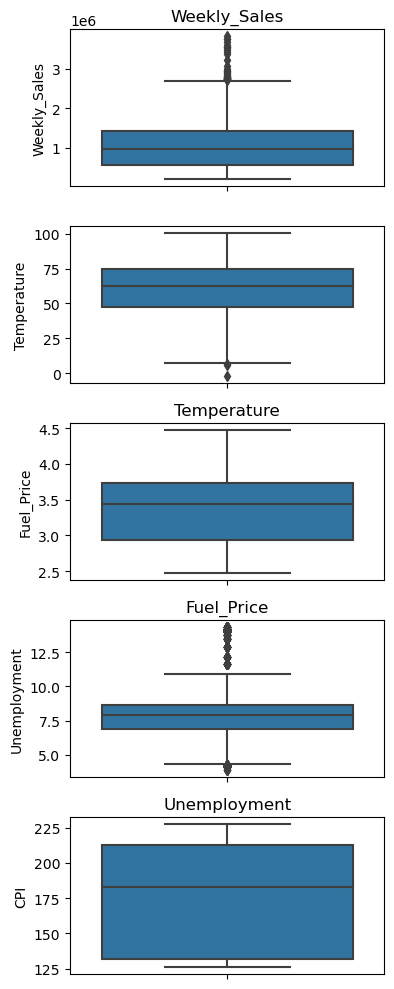

In [10]:
# now lets check for the outliers using boxplot

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(4, 10))

# Plot each boxplot
sns.boxplot(y=a["Weekly_Sales"], ax=axes[0])
axes[0].set_title("Weekly_Sales")


sns.boxplot(y=a["Temperature"], ax=axes[1])
axes[2].set_title("Temperature")

sns.boxplot(y=a["Fuel_Price"], ax=axes[2])
axes[3].set_title("Fuel_Price")

sns.boxplot(y=a["CPI"], ax=axes[4])
axes[4].set_title("CPI")

sns.boxplot(y=a["Unemployment"], ax=axes[3])
axes[4].set_title("Unemployment")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# as we can see "weekly_sales" and "unemployment" column has some outliers


2720371.4924999997


<Axes: ylabel='Weekly_Sales'>

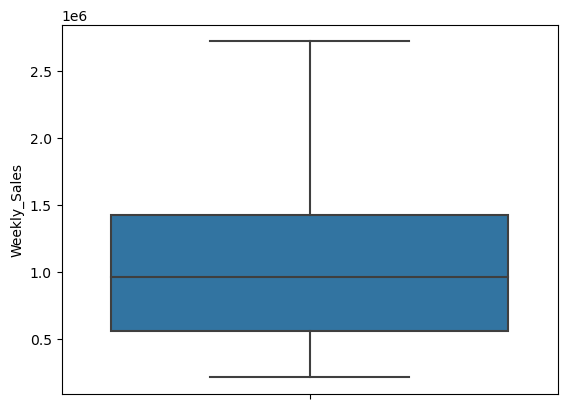

In [11]:
# Now we will remove the outlier for weekly sales column using IQR
Q1,Q3=a["Weekly_Sales"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR) # Lower Limit
UL=Q3+1.5*(IQR) # Upper Limit

print(UL)

# Now we will replace all the outliers in this sales column with the UL

a["Weekly_Sales"]=np.where(a["Weekly_Sales"]>UL,UL,a["Weekly_Sales"])

# lets print the box plot to see the data
sns.boxplot(y=a["Weekly_Sales"]) # as we can see all the outlier are removed

4.938


<Axes: ylabel='Fuel_Price'>

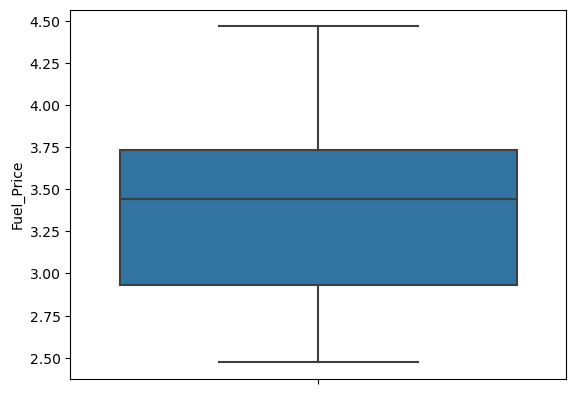

In [12]:
# Now we will remove the outlier for Fuel_Price column using IQR
Q1,Q3=a["Fuel_Price"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR) # Lower Limit
UL=Q3+1.5*(IQR) # Upper Limit

print(UL)

# Now we will replace all the outliers in this sales column with the UL

a["Fuel_Price"]=np.where(a["Fuel_Price"]>UL,UL,a["Fuel_Price"])

# lets print the box plot to see the data
sns.boxplot(y=a["Fuel_Price"]) # as we can see all the outlier are removed

In [13]:
# now lets do some analysis to understand our data set
a.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2052010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,3052010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,4052010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,5052010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,6052010,1554806.68,0,46.50,2.625,211.350143,8.106


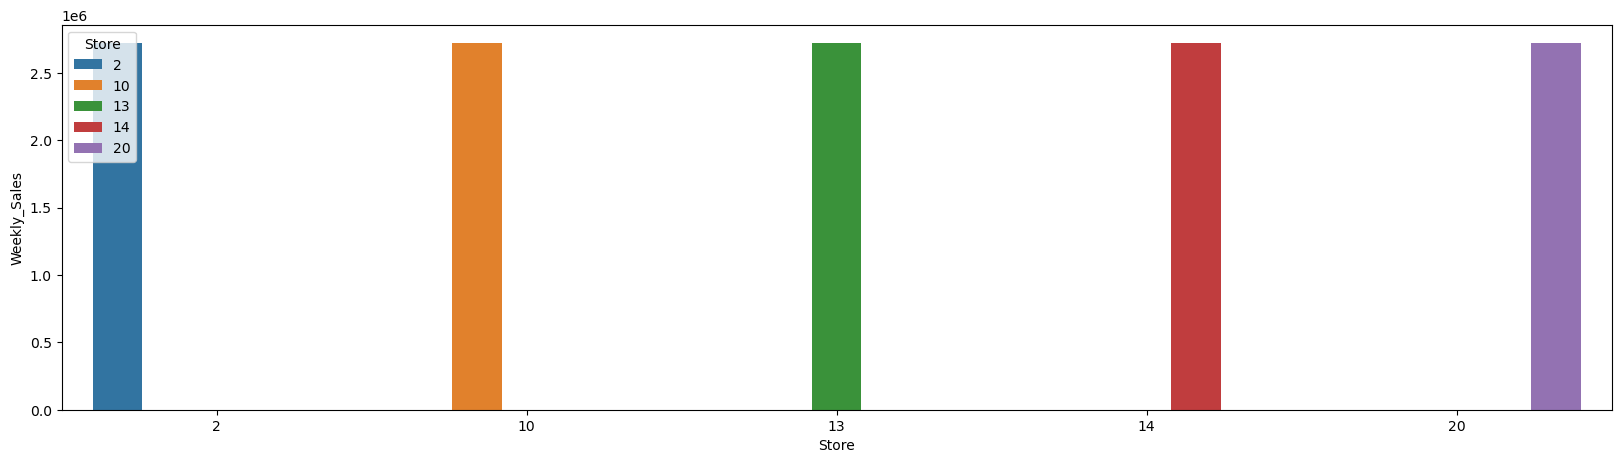

In [23]:
# Sort the DataFrame by "Weekly_Sales" column in descending order and select the top 7 rows
top_stores = a.sort_values(by="Weekly_Sales", ascending=False).head(7)

# Create the bar plot for the top 7 stores with highest sales
plt.figure(figsize=(20, 5))
sns.barplot(x=top_stores["Store"], y=top_stores["Weekly_Sales"], hue=top_stores["Store"])
plt.show()


<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

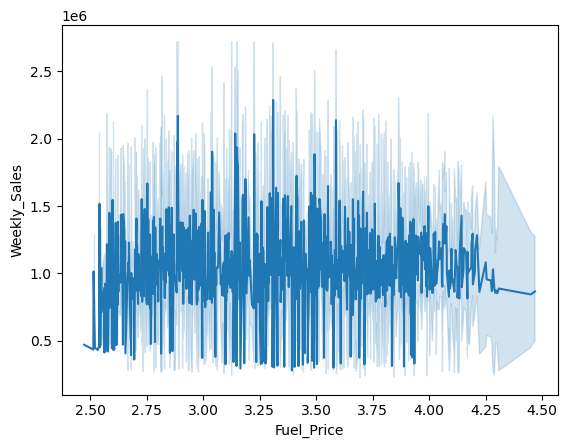

In [26]:
# lets see the relation ship between fuel price and weekly sales
sns.lineplot(x=a["Fuel_Price"],y=a["Weekly_Sales"])

In [37]:
# now we will split the data into x and y
x=a[["Date","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"]]
y=a[["Weekly_Sales"]]

# now we will divide the data into train and test to train our model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5148, 6)
(5148, 1)
(1287, 6)
(1287, 1)


In [38]:
# now lets import our Model
from sklearn.ensemble import RandomForestRegressor
dtr=RandomForestRegressor()
# now lets fit our data in the Model
dtr.fit(x_train,y_train)  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [39]:
# now lets make the prediction
dtr.predict(x_test)

array([1978413.3218 , 1246979.6147 , 1039146.7486 , ..., 1013132.17665,
        942658.1892 , 1355461.9533 ])

In [40]:
# Now lets check the accuracy score of our model
dtr.score(x_test,y_test)
# as we can see our model is 58% accurate in predicting the values.

0.589809494119635